<a href="https://colab.research.google.com/github/Umair-Syed/Genetic_algorithm_KMeans_content_clustering/blob/main/Social_Media_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install snscrape  #twitter data scrapping

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
import numpy
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import string
import re #regex

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Data Scarping**

In [ ]:
# query_news = '( '
# query_finance = '(from:BBCBusiness OR from:YahooFinance OR from:FinMinIndia OR from:JofFinance OR from:FinMinistryPak OR from:BusinessMN OR from:IFC_org OR from:UKFtweets) lang:en -filter:links -filter:replies'
# query_science_technology = '(from:technology OR from:Huawei OR from:SpaceX OR from:techreview OR from:iitmadras OR from:IITKanpur OR from:iitbombay) lang:en -filter:links -filter:replies'
# query_education = '(from:usedgov OR from:educationweek OR from:mhrd_innovation OR from:AICTE_INDIA OR from:UNESCO OR from:EDU_GovNL OR from:teainfo OR from:EducationFL) lang:en -filter:links -filter:replies'
# query_automobile = '(from:automobilemag OR from:MuscIeCar OR from:volvocars OR from:SFMTA_Muni OR from:CARmagazine) lang:en -filter:links -filter:replies'
# query_sports = '(from:BBCSport OR from:SkySports OR from:TwitterSports OR from:NFLonFOX OR from:ESL OR from:YahooSports OR from:EASPORTS) lang:en -filter:links -filter:replies'
# query_film_industry = '(from:ieEntertainment OR from:hollywoodnetflx OR from:awesomeitv OR from:etimes OR from:PHVegas) lang:en -filter:links -filter:replies'
# query_fitness = '(from:muscle_fitness OR from:FitnessMagazine OR from:LAFitness) lang:en -filter:links -filter:replies'
# query_environment = '(from:BBCEarth OR from:NatGeo OR from:Discovery) lang:en -filter:links -filter:replies'
# query_health_medicine = '(from:NASEM_Health OR from:HopkinsMedicine OR from:medical_xpress OR from:HarvardHealth) lang:en -filter:links -filter:replies'

# queries = [query_news, query_finance, query_science_technology, query_education, query_automobile, query_sports, query_film_industry, query_fitness, query_environment, query_health_medicine]
# cluster_names = ['news', 'finance', 'science_technology', 'education', 'automobile', 'sports', 'film_industry', 'fitness', 'environment', 'health_medicine']

In [ ]:
# all_tweets = [] 
# tweets = [] #for one category
# limits = 500

# for index in range(len(queries)):
#   for tweet in sntwitter.TwitterSearchScraper(queries[index]).get_items():
#       if(len(tweets) == limits):
#           break
#       else:
#           tweets.append([tweet.user.username, tweet.content, cluster_names[index]])
#   all_tweets.extend(tweets)
#   tweets.clear()

In [ ]:
# df = pd.DataFrame(all_tweets, columns=['username', 'tweet', 'topic'])

In [ ]:
# saving the dataframe
# df.to_csv('twitter_data_with_labels.csv')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/twitter_data_with_labels.csv')

In [ ]:
df

,username,tweet,topic
0,BBCWorld,Forecasters have warned freezing temperatures ...,news
1,BBCWorld,A powerful winter storm is sweeping the US and...,news
2,BBCWorld,A powerful Arctic storm is spreading across a ...,news
3,BBCWorld,These are the scenes in Buenos Aires right now...,news
4,BBCWorld,Elon Musk has been Twitter's main character fo...,news
...,...,...,...
4995,NASEM_Health,Wishing all a healthy &amp; safe #LaborDay wee...,health_medicine
4996,HarvardHealth,Harvard Health happy to be here and ready to #...,health_medicine
4997,NASEM_Health,Inspired by the #2016Olympics? Tell us your ne...,health_medicine
4998,NASEM_Health,Wishing you a healthy &amp; safe 4th of July w...,health_medicine


# **Data Cleaning**

In [ ]:
pip install pyspellchecker

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from spellchecker import SpellChecker

spell = SpellChecker()
spell = SpellChecker(distance=1)

def remove_stops(text, stops):
    # removing &amp;
    text = re.sub(r"&(amp;)+", " ", text)
    
    # spell correction and removing stop words
    words = text.split()
    final = []
    for word in words:
        corrected_word = spell.correction(word)
        word = corrected_word if corrected_word != None else word
        if word not in stops:
            final.append(word)
    final = " ".join(final)

    # removing punctuations and digits
    final = final.translate(str.maketrans("", "", string.punctuation))
    final = "".join([i for i in final if not i.isdigit()])

    # removing double whitespaces
    while "  " in final:
        final = final.replace("  ", " ")

    # removing newline characters \n
    final = final.replace("\n", " ")      
    
    return (final)

In [ ]:
def clean_docs(docs):
    stops = stopwords.words("english")  
    final = []
    for doc in docs:
        clean_doc = remove_stops(doc, stops)
        final.append(clean_doc)
    return (final)

In [ ]:
tweets = df['tweet'].tolist()
print(tweets[4997:])

['Inspired by the #2016Olympics? Tell us your new fitness goals!', 'Wishing you a healthy &amp; safe 4th of July weekend!', "Great questions, @EverydayHealth! We enjoyed today's chat."]


In [ ]:
cleaned_tweets = clean_docs(tweets)
print(cleaned_tweets[4997:])

['Inspired Olympics Tell us new fitness goals', 'Wishing healthy safe ith July weekend', 'Great questions EverydayHealth We enjoyed todays chat']


# **Computing TF_IDF & Visualization**

### Computing TF_IDF

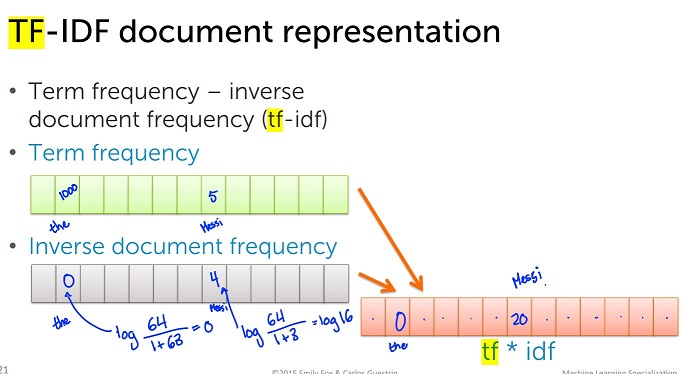

In [ ]:
vectorizer = TfidfVectorizer(lowercase=True,
                              # max_features=100,
                              # max_df=0.9, # ignore terms that have a document frequency strictly higher than the 80% of corpus
                              # min_df=5, # ignore terms that have a document frequency strictly lower than 5 documents
                              # stop_words = "english"
                             )

In [ ]:
tf_idf = vectorizer.fit_transform(cleaned_tweets) 

### Why to normalize
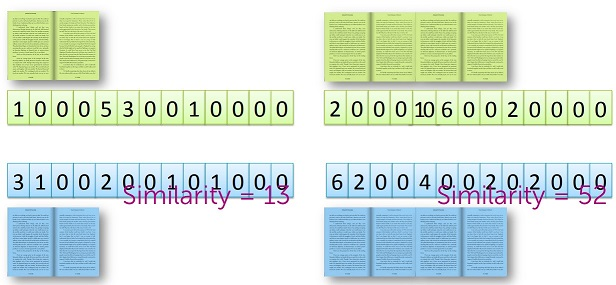

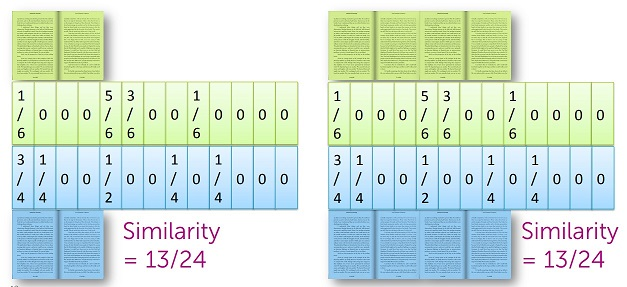

In [ ]:
# normalizing tf_idf
from sklearn.preprocessing import normalize
tf_idf = normalize(tf_idf)

In [ ]:
tf_idf

<5000x14099 sparse matrix of type '<class 'numpy.float64'>'
	with 72494 stored elements in Compressed Sparse Row format>

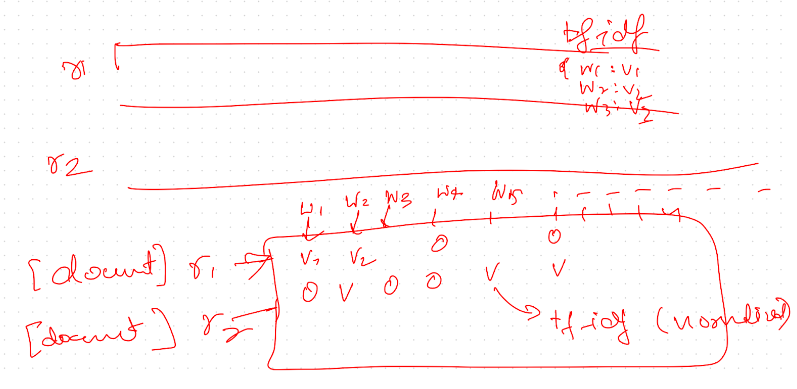

In [ ]:
feature_names = vectorizer.get_feature_names_out()
feature_names

array(['aadhar', 'aafilmsindia', 'aajkamrankhan', ..., 'zucchini',
       '𝗶𝗻𝗰𝗿𝗲𝗱𝗶𝗯𝗹𝗲', '𝙣𝙤𝙩'], dtype=object)

In [ ]:
def get_tf_idf_dict_for_tweet_index(index):
  tf_idf_matrix = tf_idf[index].todense()
  feature_index = tf_idf_matrix[0,:].nonzero()[1]
  tfidf_scores = zip([feature_names[i] for i in feature_index], [tf_idf_matrix[0, x] for x in feature_index])
  return dict(tfidf_scores)
get_tf_idf_dict_for_tweet_index(0)

{'arctic': 0.2759536017311847,
 'canada': 0.25955249802365826,
 'could': 0.17708665052064684,
 'dangers': 0.293779217344607,
 'forecasters': 0.30792820444612684,
 'freezing': 0.293779217344607,
 'frostbite': 0.30792820444612684,
 'lead': 0.204273524625189,
 'minutes': 0.19776247786422396,
 'so': 0.2554423770318528,
 'storm': 0.2517657485199504,
 'temperatures': 0.28374035123489255,
 'us': 0.13861323196748676,
 'warned': 0.293779217344607,
 'within': 0.25955249802365826}

### Visualization

In [ ]:
import seaborn as sns

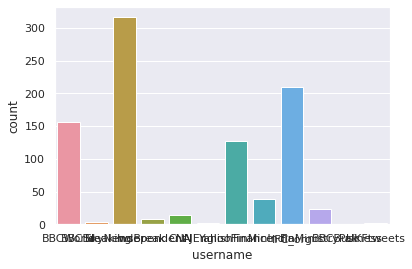

In [ ]:
sns.set(style="darkgrid")
# titanic = sns.load_dataset("titanic")
ax = sns.countplot(x="username", data=df.iloc[:900])

SFMTA_Muni         10.00
BBCSport            9.62
HopkinsMedicine     8.82
awesomeitv          8.58
LAFitness           7.62
SkyNewsBreak        6.32
Huawei              6.26
IFC_org             5.42
Discovery           4.48
NatGeo              3.46
SpaceX              3.20
BBCWorld            3.14
YahooFinance        2.56
UNESCO              2.50
educationweek       2.42
usedgov             2.22
FitnessMagazine     2.08
BBCEarth            2.06
EducationFL         2.04
etimes              1.04
FinMinistryPak      1.00
FinMinIndia         0.92
NASEM_Health        0.82
technology          0.46
HarvardHealth       0.36
muscle_fitness      0.30
CNN                 0.28
EDU_GovNL           0.24
ieEntertainment     0.22
AICTE_INDIA         0.22
teainfo             0.20
TwitterSports       0.16
mhrd_innovation     0.16
Independent         0.16
PHVegas             0.16
NFLonFOX            0.14
techreview          0.08
BBCBreaking         0.06
SkySports           0.04
UKFtweets           0.04


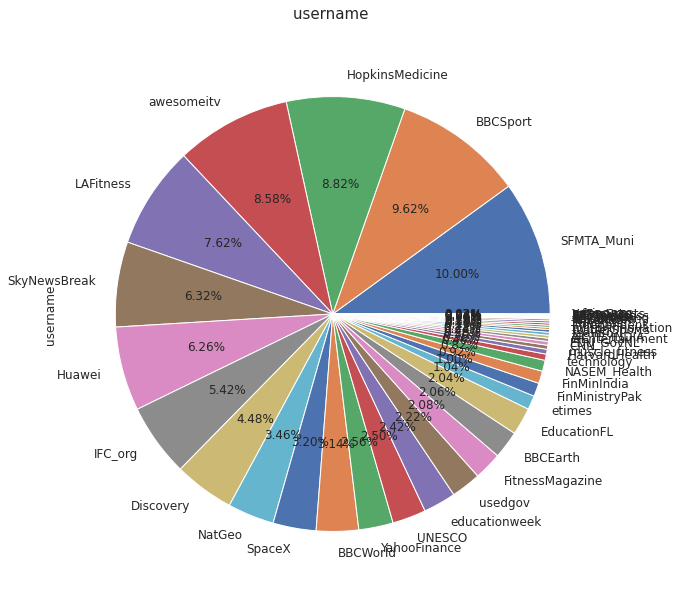

In [ ]:
#Propagation by variable
def propByVar(df, variable):
    dataframe_pie = df[variable].value_counts()
    ax = dataframe_pie.plot.pie(figsize=(10,10), autopct='%1.2f%%', fontsize = 12)
    ax.set_title(variable + ' \n', fontsize = 15)
    return numpy.round(dataframe_pie/df.shape[0]*100,2)
propByVar(df, 'username')

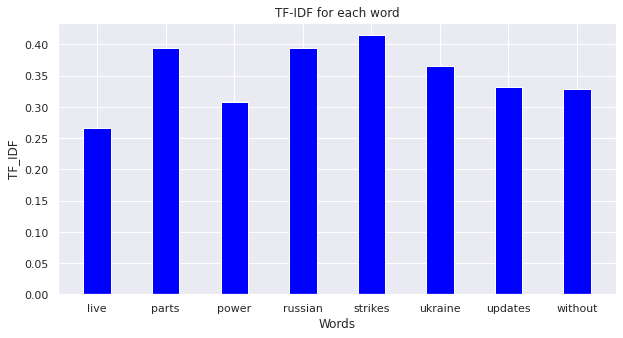

In [ ]:
data = get_tf_idf_dict_for_tweet_index(5)
words = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(words, values, color ='blue',
        width = 0.4)
 
plt.xlabel("Words")
plt.ylabel("TF_IDF")
plt.title("TF-IDF for each word")
plt.show()

In [ ]:
pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


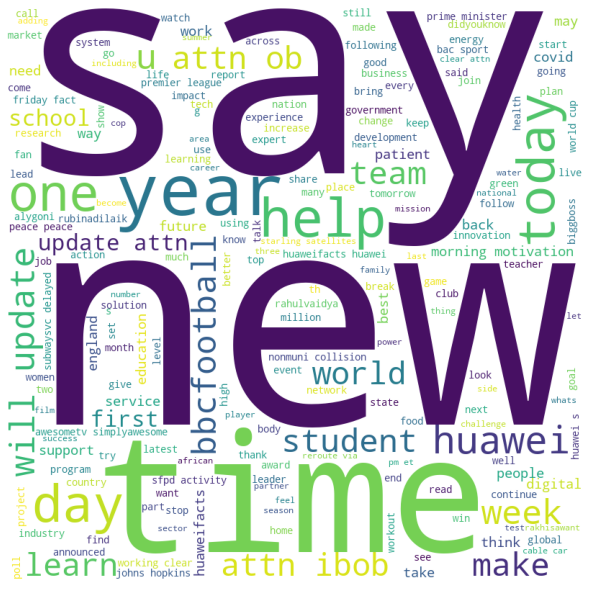

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
 
words_string = ''
stopwords = set(STOPWORDS)
 
for val in cleaned_tweets:
     
    # val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    words_string += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(words_string)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

# **Single Objective Genetic Algorithm (SOGA) implementation**

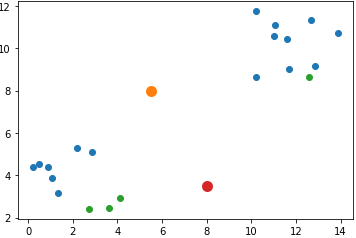

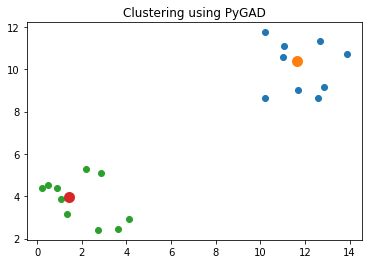

In [ ]:
!pip install pygad
!pip install turicreate
import pygad
import numpy
import turicreate as tc
from sklearn.metrics import pairwise_distances

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#just testing
# tc.toolkits.distances.euclidean(tf_idf[0], tf_idf[1]) #gives error
tc.toolkits.distances.euclidean(get_tf_idf_dict_for_tweet_index(0), get_tf_idf_dict_for_tweet_index(1))

1.28052175189315

In [ ]:
#just testing.. computing pairwise distance of all tweets with first three tweets
distances_from_centroids = pairwise_distances(tf_idf, tf_idf[0:3,:], metric='euclidean')
distances_from_centroids

array([[0.        , 1.28052175, 1.20759661],
       [1.28052175, 0.        , 1.17934132],
       [1.20759661, 1.17934132, 0.        ],
       ...,
       [1.38987925, 1.38493292, 1.38501401],
       [1.41421356, 1.41421356, 1.41421356],
       [1.41421356, 1.41421356, 1.41421356]])

In [ ]:
def assign_clusters(data, centroids):
    ''' input- data: tf_idf, centroid: tf_idf of centroids
    '''
    # Compute distances between each data point and the set of centroids:
    # Fill in the blank (RHS only)
    distances_from_centroids = pairwise_distances(data, centroids, metric='euclidean')
    
    # Compute cluster assignments for each data point:
    # Fill in the blank (RHS only)
    cluster_assignment = numpy.argmin(distances_from_centroids, axis=1)
    
    return cluster_assignment

In [ ]:
# 1. get number of clusters i.e number of 1's in solution param of fitness function   c
# 2. for each cluster calculate d, is sum of all distances between points and cluster  sum
# 3. compute S = sum/c
# 4. compute distance between clusters
# 5. compile fitness function 

In [ ]:
cluster_assignment = assign_clusters(tf_idf, tf_idf[0:10,:]) # choosing first 10 data points as centroids for testing purpose
print(cluster_assignment[50:100])
print(get_tf_idf_dict_for_tweet_index(0).keys())
print(get_tf_idf_dict_for_tweet_index(3).keys())
print(get_tf_idf_dict_for_tweet_index(50).keys())
print(get_tf_idf_dict_for_tweet_index(52).keys())


[3 9 3 1 1 0 9 4 3 5 3 0 1 9 1 0 9 6 9 1 6 4 1 1 0 4 4 4 4 4 6 9 2 4 1 1 0
 1 1 6 5 1 1 0 4 0 1 1 4 1]
dict_keys(['arctic', 'canada', 'could', 'dangers', 'forecasters', 'freezing', 'frostbite', 'lead', 'minutes', 'so', 'storm', 'temperatures', 'us', 'warned', 'within'])
dict_keys(['aires', 'argentina', 'bbcworldcup', 'buenos', 'celebrate', 'cup', 'eagerly', 'fans', 'follow', 'heroes', 'live', 'parade', 'right', 'scenes', 'these', 'thousands', 'waiting', 'world'])
dict_keys(['according', 'back', 'control', 'follow', 'house', 'latest', 'leaning', 'live', 'projections', 'representatives', 'republicans', 'taking', 'the', 'towards', 'us'])
dict_keys(['delivered', 'desantis', 'florida', 'follow', 'governor', 'latest', 'made', 'people', 'projected', 'promises', 'race', 'reelection', 'ron', 'shortly', 'speaks', 'supporters', 'win'])


In [ ]:
for i in range(10):
  print(len(list(get_tf_idf_dict_for_tweet_index(i).keys())))

15
11
12
18
20
8
9
9
12
13


In [ ]:
numpy.bincount(cluster_assignment)

array([2588,  204,  381,  332,  335,  166,  322,   57,  140,  475])

In [ ]:
# creating random data (Delete it)
# import random
# solution = [0]*4990 + [1]*10
# random.shuffle(solution)

In [ ]:
# centroid_index_dict = {0: index, 1: index, ...} => ith cluster : its index
def get_centroid_index_and_centroid_count(solution):
  '''input: solution e.g [0, 0, 1, 0, 0, 1, 0, 0] choosen centroids
      output: number of centroids e.g 10
              centroid indexes dictionary e.g {0: index, 1: index, 2: index}, key is cluster number and index is location in data (tf_idf matrix)
  ''' 
  count = 0
  centroid_index_dict = {}
  for i in range(len(solution)):
    if solution[i] == 1:
      centroid_index_dict[count] = i
      count += 1
  return count, centroid_index_dict

# number_of_centroids, centroid_index_dict = get_centroid_index_and_centroid_count(solution)
# print(number_of_centroids)
# print(centroid_index_dict)

In [ ]:
def within_cluster_sum(centroid_index, centroid_number, cluster_assignment): 
    '''input: 0: 727, 0th cluster with index 727 in solution
        returns: Si = (Summation D(zi, x) x belongs to Ci)/ |Ci| 
          Si is avg sum of all distances between centroid and data points with cluster Ci
    '''
    # get all data points (their indexes) assigned to this centroid
    assigned_points = []
    for i in range(len(cluster_assignment)):
      if(cluster_assignment[i] == centroid_number):
        assigned_points.append(i)

    # compute sum of distances between centroid and points
    sum = 0
    # print(f"tf_idf of centroid: {get_tf_idf_dict_for_tweet_index(centroid_index)}")
    for i in assigned_points:
      sum += tc.toolkits.distances.euclidean(get_tf_idf_dict_for_tweet_index(centroid_index), get_tf_idf_dict_for_tweet_index(i))

    number_data_points_assigned_to_cluster = len(assigned_points)
    return sum/number_data_points_assigned_to_cluster


In [ ]:
# number_of_centroids, centroid_index_dict = get_centroid_index_and_centroid_count(solution)
# S1 = within_cluster_sum(centroid_index_dict[1], 1, cluster_assignment)
# print(f"within cluster sum of cluster 1: {S1}")

In [ ]:
from sklearn.metrics import davies_bouldin_score
dbi_score = davies_bouldin_score(tf_idf.toarray(), cluster_assignment) # smaller is better
dbi_score

14.331410735771527

In [ ]:
from scipy.sparse import vstack #to concatenate sparse matrices with the same number of columns (vertical concatenation).

def fitness_func(solution, solution_idx):
  # print(f"solution len: {len(solution)}")
  number_of_centroids, centroid_index_dict = get_centroid_index_and_centroid_count(solution) #  centroid_index_dict = {0: index, 1: index, ...}
  # print(f"number_of_centroids: {number_of_centroids}")

  tf_idf_of_centroids = [[] for i in range(number_of_centroids)]
  for i in range(number_of_centroids):
    index_of_ith_cluster = centroid_index_dict[i]
    tf_idf_of_centroids[i].extend(tf_idf[index_of_ith_cluster].toarray())
  
  tf_idf_of_centroids_2d = tf_idf_of_centroids[0]
  for i in range(1, len(tf_idf_of_centroids)):
    tf_idf_of_centroids_2d = numpy.vstack((tf_idf_of_centroids_2d, tf_idf_of_centroids[i]))  # slow
  
  # print(tf_idf_of_centroids_2d)
  # print(tf_idf_of_centroids)

  # print(tf_idf_of_centroids_2d)
  # print(tf_idf_of_centroids_2d[0:2, :])
  # tf_idf_of_centroids_2d[0:2, :]
  cluster_assignment = assign_clusters(tf_idf, tf_idf_of_centroids_2d)
  # print(cluster_assignment)
  dbi_score = davies_bouldin_score(tf_idf.toarray(), cluster_assignment) # smaller is better

  return 1/dbi_score

# fitness_func(solution, [])
  
  

In [ ]:
import random

def ensure_k_centroids(solution, x):
  '''solution may have many ones, n-x randomly and make 0... n is number of centroids...x is number of clusters i.e 10'''
  new_solution = solution
  n, centroid_index_dict = get_centroid_index_and_centroid_count(solution) #  centroid_index_dict = {0: index, 1: index, ...}
  if n > x:    
    chosen = random.sample(list(centroid_index_dict.values()), k=n-x) # will return random n-k keys of dict, sample returns k items without repetition
    for i in chosen:
      new_solution[i] = 0
  elif n < x:
    count = 0
    indexes_list_of_zereos = list(set(list(range(0, len(solution)))) - set(centroid_index_dict.values()))
    rand_idx = random.sample(indexes_list_of_zereos, k=x-n)  # will return random k-n indicies
    for i in rand_idx:
      new_solution[i] = 1
  return new_solution

In [ ]:
fitness_function = fitness_func

num_generations = 40

sol_per_pop = 30
num_genes = len(tweets)

gene_type = int

init_range_low = 0
init_range_high = 1

gene_space = [0, 1]

num_parents_mating = int(sol_per_pop * 0.2)
parent_selection_type = "rws" # roulette wheel selection
keep_parents = int(sol_per_pop * 0.1) # number of parents in next population

crossover_type = "single_point"
crossover_probability = 0.8

# mutation_type = "random"
mutation_percent_genes = 10

parallel_processing = ['process', 2]

def on_generation(ga_instance):
  solution, solution_fitness, _ = ga_instance.best_solution()
  count = 0
  for i in range(len(solution)):
    if solution[i] == 1:
      count += 1
  print(f"Number of centroids in current solution: {count}")
  print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))

# def on_start(ga_instance):
#   print("On start called")
#   solution, solution_fitness, solution_idx = ga_instance.best_solution()
#   print(f"Solution index in population: {solution_idx}")
#   number_of_centroids, centroid_index_dict = get_centroid_index_and_centroid_count(solution) #  centroid_index_dict = {0: index, 1: index, ...}
#   print(f"number of centroid: {number_of_centroids}")
#   if(number_of_centroids > 10):  
#     # randomly choose n-k centroids and make 0
#     chosen = centroid_index_dict.choices(list(centroid_index_dict), k=10)
#     for()

def mutation_with_ensure_centroid_x(offspring, x):
  '''input: offspring e.g [[0 0 1 ...],[0 0 1 1..]], x is number of 1's to ensure...want to do 10% mutation i.e 50 / 5000, so flip '''
  new_offspring = offspring

  for child in new_offspring:

    # randomly flipping 20 values
    # print(f"type of offspring: {type(offspring)}....size of offspring {len(offspring)}... dimension of offspring: {offspring.ndim}")
    # print(offspring)
    rand_idxs = random.sample(range(len(list(child))), k=20)
    for idx in rand_idxs:
      child[idx] = 0 if child[idx] == 1 else 1

    # need to now ensure 1 are x (10) many times
    n, centroid_index_dict = get_centroid_index_and_centroid_count(child) #  centroid_index_dict = {0: index, 1: index, ...}
    if n > x:    
      chosen = random.sample(list(centroid_index_dict.values()), k=n-x) # will return random n-k keys of dict, sample returns k items without repetition
      for i in chosen:
        child[i] = 0
    elif n < x:
      count = 0
      indexes_list_of_zereos = list(set(list(range(0, len(offspring)))) - set(centroid_index_dict.values()))
      rand_idx = random.sample(indexes_list_of_zereos, k=x-n)  # will return random k-n indicies
      for i in rand_idx:
        child[i] = 1
    # elif n == x: # if number of 1 is satisfied, but we still need some mutation so that why this elif    
    #   chosen_1_index = random.choice(list(centroid_index_dict.values())) # will return random key

    #   indexes_list_of_zereos = list(set(list(range(0, len(offspring)))) - set(centroid_index_dict.values()))
    #   chosen_0_index = random.choice(indexes_list_of_zereos)  # will return random index of 0
    #   child[chosen_1_index] = 0
    #   child[chosen_0_index] = 1

  return new_offspring

def mutation_func(offspring, ga_instance):
    new_offspring = mutation_with_ensure_centroid_x(offspring, 10)
    return new_offspring

# print(mutation_with_ensure_centroid_x(solution, 10))     


In [ ]:
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       gene_space=gene_space,
                       init_range_low=init_range_low,
                       init_range_high=init_range_high,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       crossover_probability=crossover_probability,
                       mutation_type=mutation_func,
                       mutation_percent_genes=mutation_percent_genes)
                      #  on_generation=on_generation,
                      #  parallel_processing=parallel_processing)
print("Initial Population")
initial_population = ga_instance.initial_population
n,_ = get_centroid_index_and_centroid_count(initial_population[0])
print(n)
# new_sol = ensure_k_centroids(initial_population[0], 10)
# n2,_ = get_centroid_index_and_centroid_count(new_sol)
# print(n2)

new_initial_population = []
for sol in initial_population:
  new_sol = ensure_k_centroids(sol, 10)
  new_initial_population.append(new_sol)
# print(initial_population)
# print(type(initial_population))
print(new_initial_population)
print(type(new_initial_population))

ga_instance_new = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       gene_space=gene_space,
                       init_range_low=init_range_low,
                       init_range_high=init_range_high,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       crossover_probability=crossover_probability,
                       initial_population=new_initial_population,
                       mutation_type=mutation_func,
                       mutation_percent_genes=mutation_percent_genes,
                       on_generation=on_generation,
                       parallel_processing=parallel_processing)

initial_population = ga_instance_new.initial_population
n3,_ = get_centroid_index_and_centroid_count(initial_population[0])
print(n3)
# print(initial_population)
# print(type(initial_population2))

# ga_instance_new2 = pygad.GA(num_generations=num_generations,
#                        num_parents_mating=num_parents_mating,
#                        fitness_func=fitness_function,
#                        sol_per_pop=sol_per_pop,
#                        num_genes=num_genes,
#                        gene_space=gene_space,
#                        init_range_low=init_range_low,
#                        init_range_high=init_range_high,
#                        parent_selection_type=parent_selection_type,
#                        keep_parents=keep_parents,
#                        crossover_type=crossover_type,
#                        crossover_probability=crossover_probability,
#                        initial_population=initial_population2,
#                        mutation_type=mutation_func,
#                        mutation_percent_genes=mutation_percent_genes,
#                        on_generation=on_generation)


Initial Population
2520
[array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0

### ga_instance_new.run() # (20 generation, 100 population size)

*   **Without Parallel processing:** 12 mins runtime
*   **With Parallel processing:** 8 mins runtime

In [ ]:
ga_instance_new.run() 

Number of centroids in current solution: 10
Fitness value of the best solution = 0.08625883435293187
Number of centroids in current solution: 10
Fitness value of the best solution = 0.08625883435293187
Number of centroids in current solution: 10
Fitness value of the best solution = 0.08625883435293187
Number of centroids in current solution: 10
Fitness value of the best solution = 0.09096787695798146
Number of centroids in current solution: 10
Fitness value of the best solution = 0.09096787695798146
Number of centroids in current solution: 10
Fitness value of the best solution = 0.09096787695798146
Number of centroids in current solution: 10
Fitness value of the best solution = 0.09096787695798146
Number of centroids in current solution: 10
Fitness value of the best solution = 0.09096787695798146
Number of centroids in current solution: 10
Fitness value of the best solution = 0.09096787695798146
Number of centroids in current solution: 10
Fitness value of the best solution = 0.09101093

In [ ]:
solution, solution_fitness, solution_idx = ga_instance_new.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

Parameters of the best solution : [0. 0. 0. ... 0. 0. 0.]
Fitness value of the best solution = 0.09213829448818459
Index of the best solution : 0


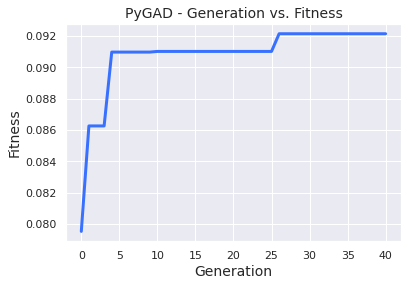

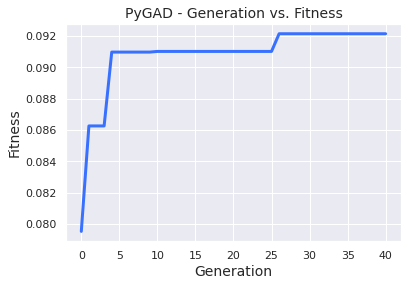

In [ ]:
ga_instance_new.plot_fitness()

In [ ]:
number_of_centroids, centroid_index_dict =  get_centroid_index_and_centroid_count(solution)
print(number_of_centroids)
print(centroid_index_dict)

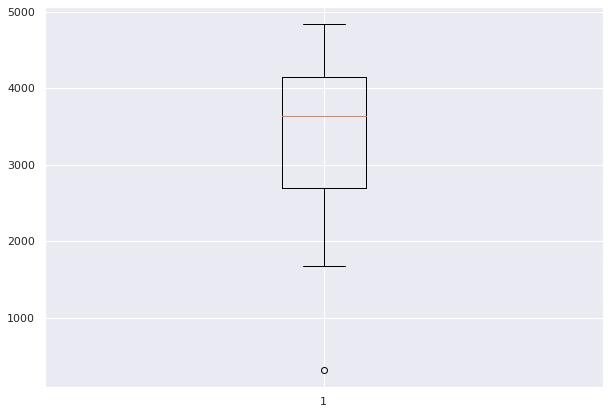

In [ ]:
centroids = {0: 315, 1: 1677, 2: 2508, 3: 3245, 4: 3589, 5: 3692, 6: 3880, 7: 4239, 8: 4347, 9: 4836}
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(centroids.values())
plt.show()

# **Applying KMeans**

#### **First using KMeans without GA produced centroids**

In [ ]:
from sklearn.cluster import KMeans
k = 10
kmean = KMeans(n_clusters = k, init=tf_idf[2:12].toarray(), max_iter=100, n_init=3)
kmean.fit(tf_idf)


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:1146: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=3.
  self._check_params(X)


KMeans(init=array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]),
       max_iter=100, n_clusters=10, n_init=3)

In [ ]:
cluster_distances = kmean.transform(tf_idf)
print(cluster_distances.shape)
print(cluster_distances[0])

(5000, 10)
[1.00043497 1.01732816 1.02528537 1.02998575 1.02094829 1.0239921
 1.27362336 1.00555908 1.01030375 1.00921651]


In [ ]:
cluster_assignment = kmean.labels_
cluster_assignment

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
bincount = numpy.bincount(cluster_assignment)
bincount

array([2871,  316,  275,   93,  224,  142,   39,  398,  186,  456])

In [ ]:
kmean.predict(tf_idf[5])

array([3], dtype=int32)

In [ ]:
print(kmean.cluster_centers_)

[[7.72968902e-05 8.29659141e-05 9.68311004e-05 ... 0.00000000e+00
  1.32372805e-04 1.10204037e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


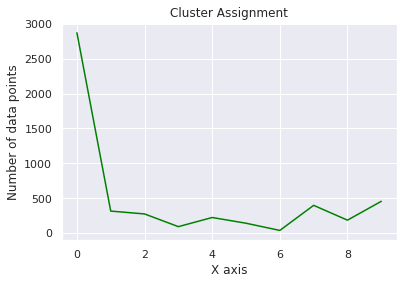

In [ ]:
plt.title("Cluster Assignment")
plt.xlabel("X axis")
plt.ylabel("Number of data points")
x = numpy.arange(0, 10)
plt.plot(x, bincount[0:10], color ="green")
plt.show()

#### **Now using KMeans with GA produced centroids as initial centroids**

In [ ]:
kmean2 = KMeans(n_clusters = k, init='k-means++')
kmean2.fit(tf_idf)

KMeans(n_clusters=10)

In [ ]:
cluster_assignment = kmean.labels_
cluster_assignment[0:15]

array([0, 0, 0, 1, 8, 3, 4, 3, 0, 7, 8, 9, 0, 0, 0], dtype=int32)

In [ ]:
kmean2.predict(tf_idf[5])

array([0], dtype=int32)

In [ ]:
print(kmean2.predict(tf_idf[5]))
print(kmean2.predict(tf_idf[2]))
print(df.iloc[5].topic)
print(df.iloc[2].topic)

[0]
[0]
news
news


In [ ]:
print(df.iloc[5].tweet)
print(df.iloc[20].tweet)

Parts of Ukraine without power after Russian strikes

⬇️ Live updates
What demands are Chinese Covid lockdown protesters circulating on social media?

Follow latest ⬇️


In [ ]:
cluster_assignment = kmean2.labels_
bincount = numpy.bincount(cluster_assignment)
bincount

array([2306,  414,   41,  523,  347,  268,  308,   39,  105,  649])

In [ ]:
number_of_centroids, centroid_index_dict =  get_centroid_index_and_centroid_count(solution)
# number_of_centroids = 10
# centroid_index_dict = {0: 77, 1: 600, 2: 1250, 3: 1750, 4: 2250, 5: 2750, 6: 3250, 7: 49, 8: 3550, 9: 4250}
# print(number_of_centroids)
print(centroid_index_dict)

{0: 77, 1: 600, 2: 1250, 3: 1750, 4: 2250, 5: 2750, 6: 3250, 7: 49, 8: 3550, 9: 4250}


In [ ]:
k = 10
# initial_centroids = numpy.array(tf_idf[centroid_index_dict[0]])
# initial_centroids = [] 
# for i in range(0, number_of_centroids):
#   initial_centroids.append(tf_idf[i].tolist())
# # print(initial_centroids)
# initial_centroids = numpy.stack(initial_centroids)
# print(initial_centroids)

tf_idf_of_centroids = [[] for i in range(number_of_centroids)]
for i in range(number_of_centroids):
  index_of_ith_cluster = centroid_index_dict[i]
  tf_idf_of_centroids[i].extend(tf_idf[index_of_ith_cluster].toarray())

tf_idf_of_centroids_2d = tf_idf_of_centroids[0]
for i in range(1, len(tf_idf_of_centroids)):
  tf_idf_of_centroids_2d = numpy.vstack((tf_idf_of_centroids_2d, tf_idf_of_centroids[i]))  # slow

In [ ]:
initial_centroids = tf_idf_of_centroids_2d
ga_kmeans = KMeans(n_clusters = k, init=initial_centroids, max_iter=300, n_init=1)
ga_kmeans.fit(tf_idf)

KMeans(init=array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]),
       n_clusters=10, n_init=1)

In [ ]:
cluster_distances = ga_kmeans.transform(tf_idf)
print(cluster_distances.shape)
print(cluster_distances[0])

(5000, 10)
[1.00063898 1.02187667 1.02521228 1.00767507 1.05837655 1.02014854
 1.01883226 0.99288626 1.02173125 1.01737876]


In [ ]:
cluster_assignment = ga_kmeans.labels_
cluster_assignment

array([7, 7, 7, ..., 7, 0, 9], dtype=int32)

In [ ]:
bincount = numpy.bincount(cluster_assignment)
bincount

array([2740,  138,  277,  365,  447,  159,  302,  261,  161,  150])

In [ ]:
# x = numpy.random.normal(size = 1000)                                         
# counts, bins, patches = plt.hist(x, normed=True)
# plt.ylabel('Probability')

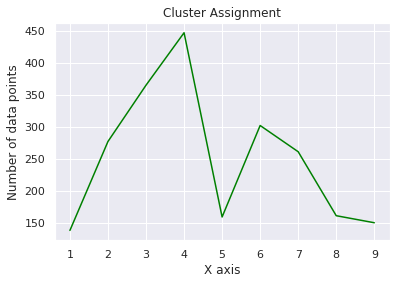

In [ ]:
plt.title("Cluster Assignment")
plt.xlabel("X axis")
plt.ylabel("Number of data points")
x = numpy.arange(1, 10)
plt.plot(x, bincount[1:10], color ="green")
plt.show()

### **Retrieve some results**

In [ ]:
print(ga_kmeans.predict(tf_idf[2000])) # assigned to 4th cluster
print(ga_kmeans.predict(tf_idf[2100])) # assigned to 4th cluster
print(df.iloc[2000].topic) # Both belong to same category
print(df.iloc[2100].topic)

[4]
[4]
automobile
automobile
